<a href="https://colab.research.google.com/github/viviennejuma/R-unsupervised/blob/main/Anomaly_and_association.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages("anomalize")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘listenv’, ‘parallelly’, ‘TTR’, ‘prodlim’, ‘future’, ‘globals’, ‘later’, ‘quadprog’, ‘quantmod’, ‘gower’, ‘ipred’, ‘furrr’, ‘htmlwidgets’, ‘lazyeval’, ‘crosstalk’, ‘promises’, ‘warp’, ‘fracdiff’, ‘lmtest’, ‘tseries’, ‘urca’, ‘RcppArmadillo’, ‘recipes’, ‘rsample’, ‘plotly’, ‘padr’, ‘xts’, ‘zoo’, ‘slider’, ‘anytime’, ‘timeDate’, ‘forecast’, ‘timetk’, ‘sweep’, ‘tibbletime’




In [2]:
install.packages("lubridate")
install.packages("tibbletime")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
# Load tidyverse and anomalize
# ---
# 
library(tidyverse)
library(anomalize)
library(lubridate)
library(tibbletime)
library(data.table)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

══ Use anomalize to improve your Forecasts by 50%! ═════════════════════════════
Business Science offers a 1-hour course - Lab #18: Time Series Anomaly Detection!
</> Learn more at: https://university.business-science.io/p/learning-labs-pro </>


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘tibbletime’


The following object is masked from ‘package:stats’:

    filter



Attaching package: ‘data.table’


Th

In [4]:
# Read the data 

anomaly <- fread("http://bit.ly/CarreFourSalesDataset")


In [5]:
head(anomaly,3)

Date,Sales
<chr>,<dbl>
1/5/2019,548.9715
3/8/2019,80.2200
3/3/2019,340.5255


# Cleaning the data

In [6]:
#Checking for missing values
colSums(is.na(anomaly))

Date Sales 
    0     0

In [7]:
# duplicates
sum(duplicated(anomaly))

[1] 0

In [8]:
#Changing table to tibble
anomaly$Date <- as.Date(anomaly$Date, format = "%m/%d/%Y")
df <- as.tibble(anomaly)


Warning message:
“`as.tibble()` was deprecated in tibble 2.0.0.
Please use `as_tibble()` instead.
The signature and semantics have changed, see `?as_tibble`.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


In [10]:
is_tibble(df)

[1] TRUE

In [11]:
#aggregating sales values to get daily records
df.anomaly <- aggregate(df["Sales"], by=df["Date"],sum)
head(df.anomaly)

,Date,Sales
,<date>,<dbl>
1,2019-01-01,4745.181
2,2019-01-02,1945.503
3,2019-01-03,2078.128
4,2019-01-04,1623.688
5,2019-01-05,3536.684
6,2019-01-06,3614.205


In [12]:
df.anomaly <- as.tibble(df.anomaly)
is_tibble(df.anomaly)

[1] TRUE

# Anomaly detection

In [13]:

anomaly.detect <- df.anomaly %>%
time_decompose(Sales, method = "stl", frequency = "auto", trend = "auto") %>%
anomalize(remainder, method = "gesd", alpha = 0.05, max_anoms = 0.2) %>%
plot_anomaly_decomposition()

Converting from tbl_df to tbl_time.
Auto-index message: index = Date

frequency = 7 days

trend = 30 days

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



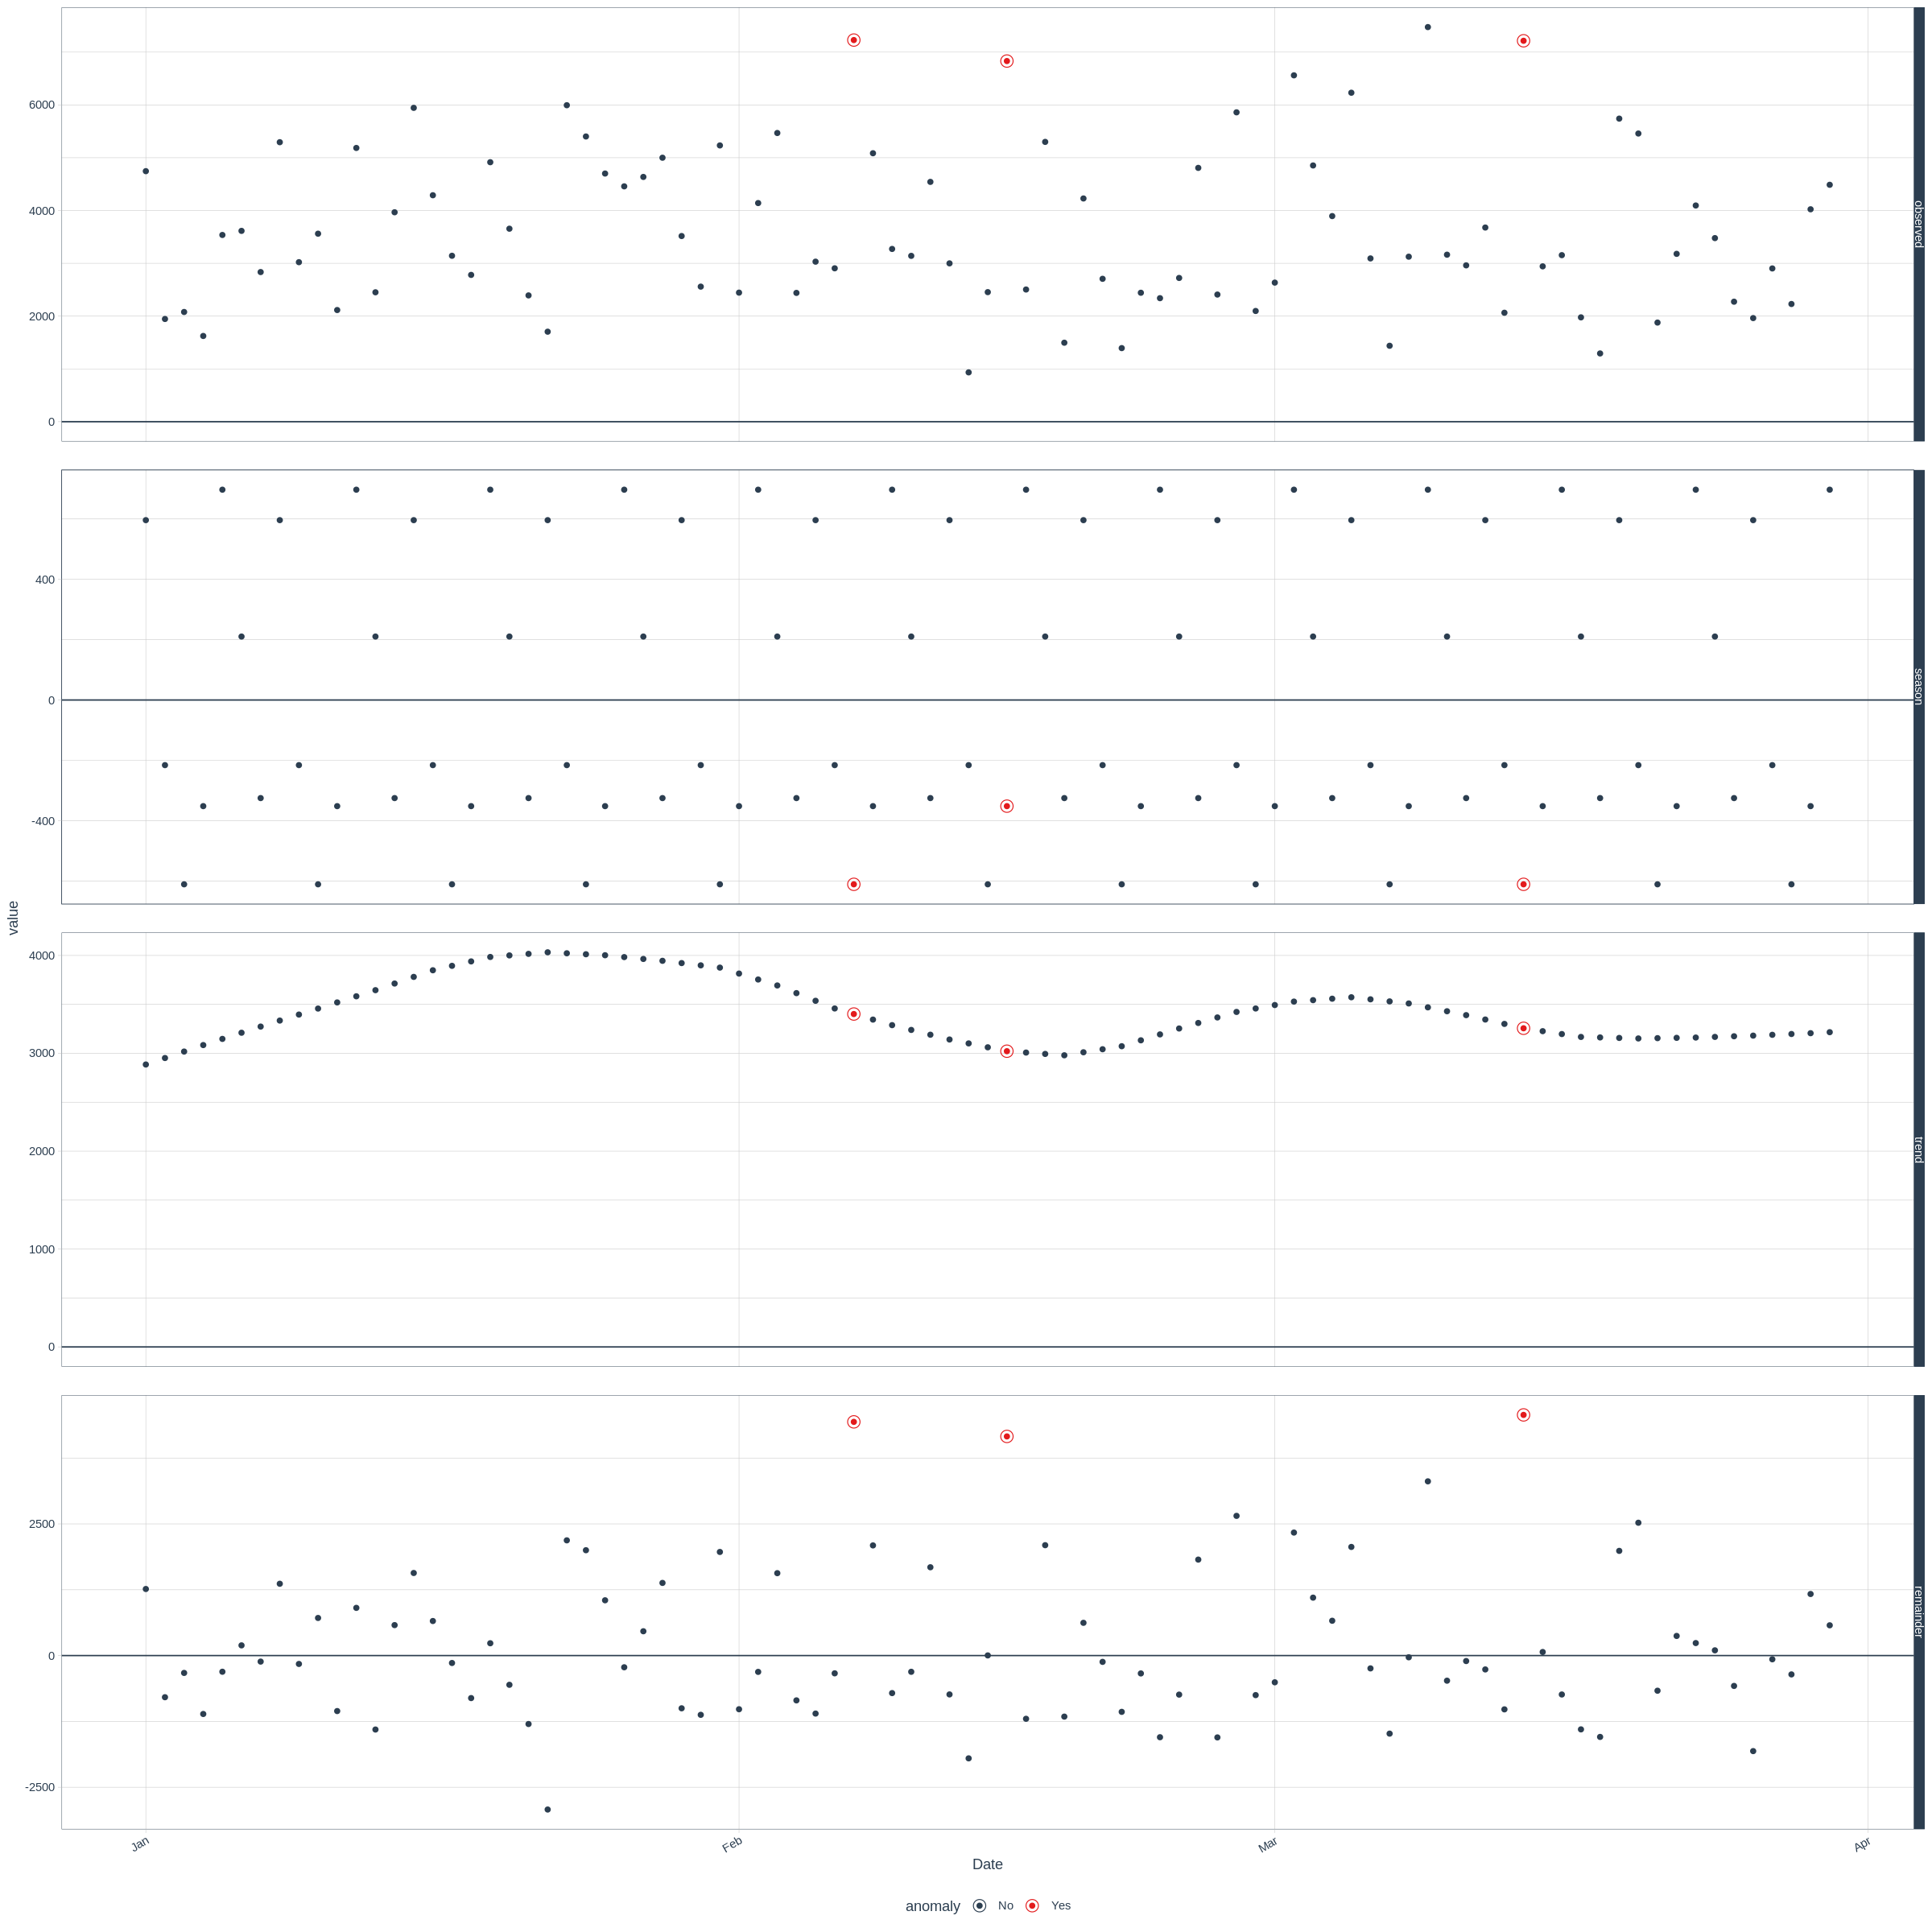

In [15]:
options(repr.plot.width = 20, repr.plot.height = 20)
anomaly.detect

Conclusions
> 
The sales data seems to contain some anomalies as shown by the red points on the graph above It would be important for the marketing
team to check them out to ascertain they are not fraud.

# Association Rules 

In [18]:
install.packages("arules")
library(arules)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack



Attaching package: ‘arules’


The following object is masked from ‘package:dplyr’:

    recode


The following objects are masked from ‘package:base’:

    abbreviate, write




In [20]:
# importing our data
# reading our data
path <-"http://bit.ly/SupermarketDatasetII"
association <-read.transactions(path, sep = ",")

Warning message in asMethod(object):
“removing duplicated items in transactions”


In [21]:
association

transactions in sparse format with
 7501 transactions (rows) and
 119 items (columns)

In [22]:
# previewing the column names
colnames(association)

[1] "almonds"              "antioxydant juice"    "asparagus"           
  [4] "avocado"              "babies food"          "bacon"               
  [7] "barbecue sauce"       "black tea"            "blueberries"         
 [10] "body spray"           "bramble"              "brownies"            
 [13] "bug spray"            "burger sauce"         "burgers"             
 [16] "butter"               "cake"                 "candy bars"          
 [19] "carrots"              "cauliflower"          "cereals"             
 [22] "champagne"            "chicken"              "chili"               
 [25] "chocolate"            "chocolate bread"      "chutney"             
 [28] "cider"                "clothes accessories"  "cookies"             
 [31] "cooking oil"          "corn"                 "cottage cheese"      
 [34] "cream"                "dessert wine"         "eggplant"            
 [37] "eggs"                 "energy bar"           "energy drink"        
 [40] "escalope"             "extra dark chocolate" "flax seed"           
 [43] "french fries"         "french wine"          "fresh bread"         
 [46] "fresh tuna"           "fromage blanc"        "frozen smoothie"     
 [49] "frozen vegetables"    "gluten free bar"      "grated cheese"       
 [52] "green beans"          "green grapes"         "green tea"           
 [55] "ground beef"          "gums"                 "ham"                 
 [58] "hand protein bar"     "herb & pepper"        "honey"               
 [61] "hot dogs"             "ketchup"              "light cream"         
 [64] "light mayo"           "low fat yogurt"       "magazines"           
 [67] "mashed potato"        "mayonnaise"           "meatballs"           
 [70] "melons"               "milk"                 "mineral water"       
 [73] "mint"                 "mint green tea"       "muffins"             
 [76] "mushroom cream sauce" "napkins"              "nonfat milk"         
 [79] "oatmeal"              "oil"                  "olive oil"           
 [82] "pancakes"             "parmesan cheese"      "pasta"               
 [85] "pepper"               "pet food"             "pickles"             
 [88] "protein bar"          "red wine"             "rice"                
 [91] "salad"                "salmon"               "salt"                
 [94] "sandwich"             "shallot"              "shampoo"             
 [97] "shrimp"               "soda"                 "soup"                
[100] "spaghetti"            "sparkling water"      "spinach"             
[103] "strawberries"         "strong cheese"        "tea"                 
[106] "tomato juice"         "tomato sauce"         "tomatoes"            
[109] "toothpaste"           "turkey"               "vegetables mix"      
[112] "water spray"          "white wine"           "whole weat flour"    
[115] "whole wheat pasta"    "whole wheat rice"     "yams"                
[118] "yogurt cake"          "zucchini"

In [23]:
# verifying the class of the data
class(association)

[1] "transactions"
attr(,"package")
[1] "arules"

In [24]:
# preview the items that make up our dataset
items<-as.data.frame(itemLabels(association))
colnames(items) <- "Item"
head(items, 10)    

,Item
,<chr>
1,almonds
2,antioxydant juice
3,asparagus
4,avocado
5,babies food
6,bacon
7,barbecue sauce
8,black tea
9,blueberries


In [25]:
#  Generating a summary of the dataset
summary(association)

transactions as itemMatrix in sparse format with
 7501 rows (elements/itemsets/transactions) and
 119 columns (items) and a density of 0.03288973 

most frequent items:
mineral water          eggs     spaghetti  french fries     chocolate 
         1788          1348          1306          1282          1229 
      (Other) 
        22405 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
1754 1358 1044  816  667  493  391  324  259  139  102   67   40   22   17    4 
  18   19   20 
   1    2    1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   3.914   5.000  20.000 

includes extended item information - examples:
             labels
1           almonds
2 antioxydant juice
3         asparagus

In [26]:
# Exploring the frequency of some articles 
itemFrequency(association[, 8:10],type = "absolute")

black tea blueberries  body spray 
        107          69          86

In [27]:
round(itemFrequency(association[, 8:10],type = "relative")*100,2)

black tea blueberries  body spray 
       1.43        0.92        1.15

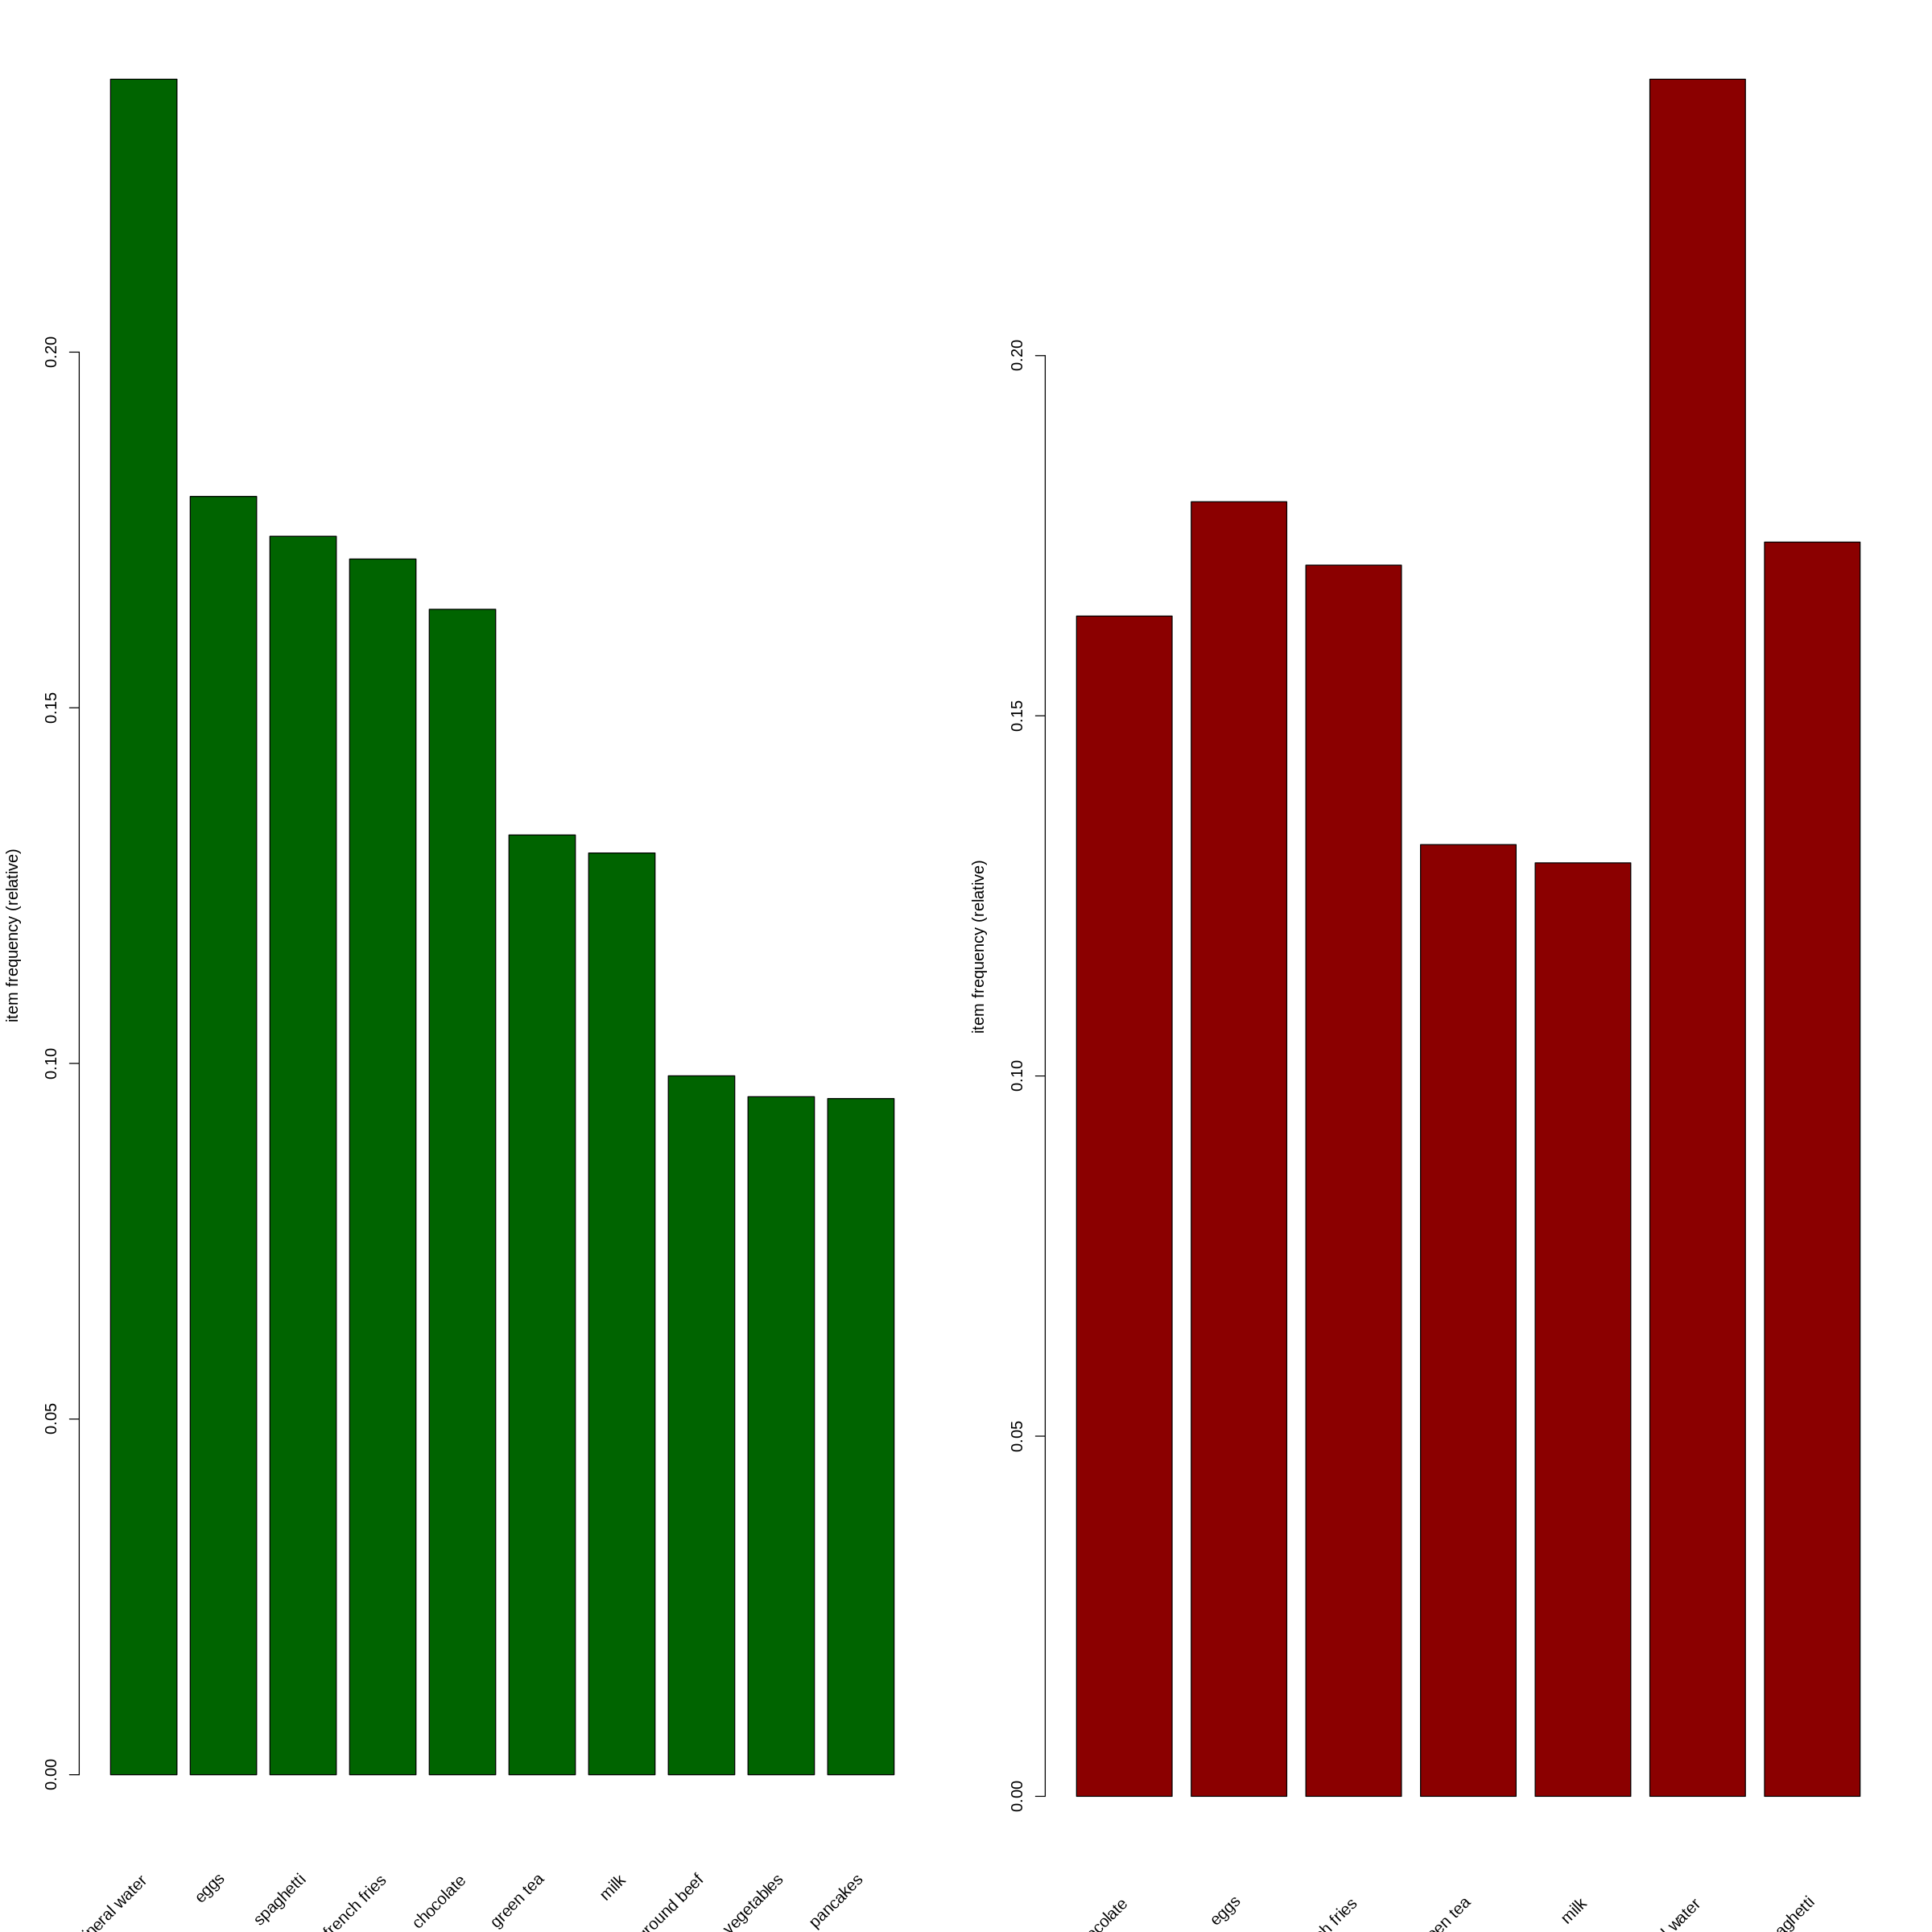

In [28]:
# Producing a chart of frequencies and fitering 
# Displaying top 10 most common items in the transactions dataset 
# and the items whose relative importance is at least 10%
par(mfrow = c(1, 2))

# plot the frequency of items
itemFrequencyPlot(association, topN = 10,col="darkgreen")
itemFrequencyPlot(association, support = 0.1,col="darkred")

In [29]:
# Building a model based on association rules using the apriori function 
# We use Min Support as 0.001 and confidence as 0.8
rules <- apriori (association, parameter = list(supp = 0.001, conf = 0.8))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 7 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[119 item(s), 7501 transaction(s)] done [0.00s].
sorting and recoding items ... [116 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 done [0.01s].
writing ... [74 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [30]:
rules

set of 74 rules 

In [31]:


# using the  measures of significance and interest on the rules,determining which ones are interesting and which to discard.
# Building a apriori model with Min Support as 0.002 and confidence as 0.8.
rules2 <- apriori (association,parameter = list(supp = 0.002, conf = 0.8)) 

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.002      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 15 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[119 item(s), 7501 transaction(s)] done [0.00s].
sorting and recoding items ... [115 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 done [0.00s].
writing ... [2 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [32]:
# Building apriori model with Min Support as 0.002 and confidence as 0.6.
rules3 <- apriori (association, parameter = list(supp = 0.001, conf = 0.6)) 

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.6    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 7 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[119 item(s), 7501 transaction(s)] done [0.00s].
sorting and recoding items ... [116 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 done [0.01s].
writing ... [545 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [33]:
rules2

set of 2 rules 

In [34]:
rules3

set of 545 rules 

In [35]:
 # the first model had 74 rules while the second has 2. these had a confidence level of 0.8 but 
# different minimum supports. the same applies to the third that had 545 rules. 
# from this , we can conclude that a higher support level equals a loss in the rules while a low confidence level 
# equals a g=higher number of rules, though not all of them will be useful.

In [36]:
# performing an exploration of our model through the use of the summary function as shown
summary(rules)


set of 74 rules

rule length distribution (lhs + rhs):sizes
 3  4  5  6 
15 42 16  1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.000   4.000   4.000   4.041   4.000   6.000 

summary of quality measures:
    support           confidence        coverage             lift       
 Min.   :0.001067   Min.   :0.8000   Min.   :0.001067   Min.   : 3.356  
 1st Qu.:0.001067   1st Qu.:0.8000   1st Qu.:0.001333   1st Qu.: 3.432  
 Median :0.001133   Median :0.8333   Median :0.001333   Median : 3.795  
 Mean   :0.001256   Mean   :0.8504   Mean   :0.001479   Mean   : 4.823  
 3rd Qu.:0.001333   3rd Qu.:0.8889   3rd Qu.:0.001600   3rd Qu.: 4.877  
 Max.   :0.002533   Max.   :1.0000   Max.   :0.002666   Max.   :12.722  
     count       
 Min.   : 8.000  
 1st Qu.: 8.000  
 Median : 8.500  
 Mean   : 9.419  
 3rd Qu.:10.000  
 Max.   :19.000  

mining info:
        data ntransactions support confidence
 association          7501   0.001        0.8

In [37]:
# the summary gives us the statistical data about the rules. this is inclusive of the support, confidence and also lift


In [38]:
# Observing rules built in our model i.e. first 5 model rules
inspect(rules[1:5])


    lhs                             rhs             support     confidence
[1] {frozen smoothie,spinach}    => {mineral water} 0.001066524 0.8888889 
[2] {bacon,pancakes}             => {spaghetti}     0.001733102 0.8125000 
[3] {nonfat milk,turkey}         => {mineral water} 0.001199840 0.8181818 
[4] {ground beef,nonfat milk}    => {mineral water} 0.001599787 0.8571429 
[5] {mushroom cream sauce,pasta} => {escalope}      0.002532996 0.9500000 
    coverage    lift      count
[1] 0.001199840  3.729058  8   
[2] 0.002133049  4.666587 13   
[3] 0.001466471  3.432428  9   
[4] 0.001866418  3.595877 12   
[5] 0.002666311 11.976387 19   


In [39]:
# Interpretation of the rules:
# 1: If someone buys frozen smoothie and spinach, they are 89% likely to buy mineral water too
# 1: If someone buys bacon and pancakes, they are 81% likely to buy spaghetti too
# 1: If someone buys nonfat milk and turkey, they are 82% likely to buy mineral water too
# 1: If someone buys ground beef and nonfat milk, they are 86% likely to buy mineral water too
# 1: If someone buys frozen mushroom cream sauce and pasta, they are 95% likely to buy escalope too


In [40]:
# Ordering these rules by a criteria such as the level of confidence
# then looking at the first five rules.
rules<-sort(rules, by="confidence", decreasing=TRUE)
inspect(rules[1:5])


    lhs                                          rhs             support    
[1] {french fries,mushroom cream sauce,pasta} => {escalope}      0.001066524
[2] {ground beef,light cream,olive oil}       => {mineral water} 0.001199840
[3] {cake,meatballs,mineral water}            => {milk}          0.001066524
[4] {cake,olive oil,shrimp}                   => {mineral water} 0.001199840
[5] {mushroom cream sauce,pasta}              => {escalope}      0.002532996
    confidence coverage    lift      count
[1] 1.00       0.001066524 12.606723  8   
[2] 1.00       0.001199840  4.195190  9   
[3] 1.00       0.001066524  7.717078  8   
[4] 1.00       0.001199840  4.195190  9   
[5] 0.95       0.002666311 11.976387 19   


In [41]:
# Interpretation
# Four of the given five rules have a confidence of 100 and the fifth rule has a confidence of 95
# ---


In [42]:
# If we're interested in making a promotion relating to the sale of milk, 
# we could create a subset of rules concerning these products 
# ---
# This would tell us the items that the customers bought before purchasing milk
# ---
# 
milk <- subset(rules, subset = rhs %pin% "milk")
 
# Then order by confidence
milk<-sort(milk, by="confidence", decreasing=TRUE)
milk

set of 5 rules 

In [43]:
inspect(milk[1:5])


    lhs                                  rhs    support     confidence
[1] {cake,meatballs,mineral water}    => {milk} 0.001066524 1.0000000 
[2] {escalope,hot dogs,mineral water} => {milk} 0.001066524 0.8888889 
[3] {meatballs,whole wheat pasta}     => {milk} 0.001333156 0.8333333 
[4] {black tea,frozen smoothie}       => {milk} 0.001199840 0.8181818 
[5] {burgers,ground beef,olive oil}   => {milk} 0.001066524 0.8000000 
    coverage    lift     count
[1] 0.001066524 7.717078  8   
[2] 0.001199840 6.859625  8   
[3] 0.001599787 6.430898 10   
[4] 0.001466471 6.313973  9   
[5] 0.001333156 6.173663  8   


In [44]:
# What if we wanted to determine items that customers might buy 
# who have previously bought milk?
# ---
# 
# Subset the rules
milk <- subset(rules, subset = lhs %pin% "milk")

# Order by confidence
milk<-sort(milk, by="confidence", decreasing=TRUE)

# inspect top 5
inspect(milk[15:19])


    lhs                                rhs             support     confidence
[1] {chocolate,hot dogs,milk}       => {mineral water} 0.001066524 0.8       
[2] {avocado,burgers,milk}          => {spaghetti}     0.001066524 0.8       
[3] {cookies,green tea,milk}        => {french fries}  0.001066524 0.8       
[4] {cake,eggs,milk,turkey}         => {mineral water} 0.001066524 0.8       
[5] {chocolate,eggs,milk,olive oil} => {mineral water} 0.001066524 0.8       
    coverage    lift     count
[1] 0.001333156 3.356152 8    
[2] 0.001333156 4.594793 8    
[3] 0.001333156 4.680811 8    
[4] 0.001333156 3.356152 8    
[5] 0.001333156 3.356152 8    
